# CMB PHYSICS TUTORIAL-2 

## Import modules

In [64]:
import sys, platform, os
import matplotlib
from matplotlib import pyplot as plt
import numpy as np
import camb
from camb import model, initialpower

## Plot the mean free path of photon against the Horizon scale and diffusion scale

## Define Parameters for CAMB

In [85]:
#set_params is a shortcut routine for setting many things at once
ombh2 = 0.022
H0 = 67.5
pars = camb.set_params(H0=H0, ombh2=ombh2, omch2=0.122, As=2e-9, ns=0.95)
data= camb.get_background(pars)

eta = 10**(np.linspace(0, 4,500))
zarr = data.redshift_at_conformal_time(eta)

In [105]:
back_ev = data.get_background_time_evolution(eta, ['x_e', 'visibility'])
def meanfp(z,x_e):
    om_b = ombh2 / (H0/10)**2
    rho_cr = 1e-29
    sig_th = 6.65e-25
    m_p = 1.67e-24
    n_e = x_e*rho_cr*om_b*(1 + z)**3 / m_p
    conv_mpc = 1 / (3.016e24)
    return conv_mpc / (n_e * sig_th)

lam =  meanfp(zarr,back_ev['x_e'])

def hor(eta,zarr):    
    return np.trapz( np.ones(np.size(eta)),eta) 

horsc = np.zeros(np.size(zarr))
for j in range(np.size(zarr)):
    horsc[j] = hor(eta[:j],zarr[:j])


In [106]:

def diff(eta,zarr,x_e):
    R = 0.75*(0.3 / 1e-5)*(1 + zarr)  
    sig_th = 6.65e-25
    K = ((R**2 / (1 + R)) + (16/15)) / (6 + 6*R)
    om_b = ombh2 / (H0/10)**2
    rho_cr = 1e-29
   
    m_p = 1.67e-24
    n_e = x_e*rho_cr*om_b*(1 + zarr)**3 / m_p
    conv_mpc = 1 / (3.016e24)
    
    return np.sqrt(( 1/ sig_th)*conv_mpc*np.trapz(K*(1 + zarr) / n_e , eta))


In [107]:
    
diffsc = np.zeros(np.size(zarr))
for j in range(np.size(zarr)):
    diffsc[j] = diff(eta[:j],zarr[:j],back_ev['x_e'][:j])


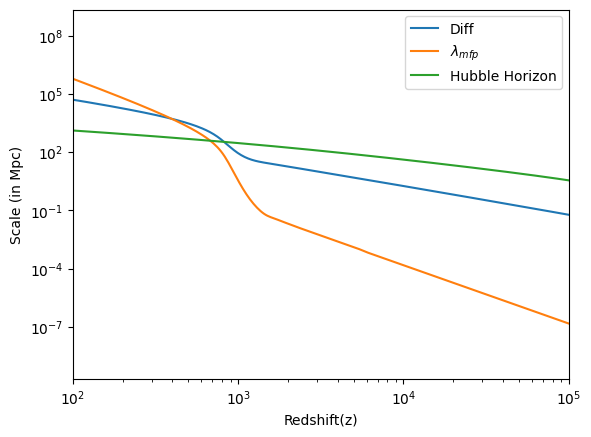

In [108]:
plt.loglog(zarr,diffsc,label = r"Diff")
plt.loglog(zarr,lam,label = r"$\lambda_{mfp}$")
plt.loglog(zarr,horsc,label="Hubble Horizon")

plt.ylabel(r"Scale (in Mpc)")
plt.xlabel("Redshift(z)")
plt.xlim(100,1e5)
#plt.xlim(1000)
plt.legend()


## Plotting the transfer functions for k = pi, 3pi/2, 2pi and 10pi for different quantities

In [129]:
pars = camb.CAMBparams()
pars.set_cosmology(H0=67.5, ombh2=0.022, omch2=0.122)
data = camb.get_transfer_functions(pars)
transfer = data.get_cmb_transfer_data()
print('Number of sources (T, E, phi..): %s; number of ell: %s; number of k: %s '%tuple(transfer.delta_p_l_k.shape))

Number of sources (T, E, phi..): 3; number of ell: 87; number of k: 2737 


143.39601307883842


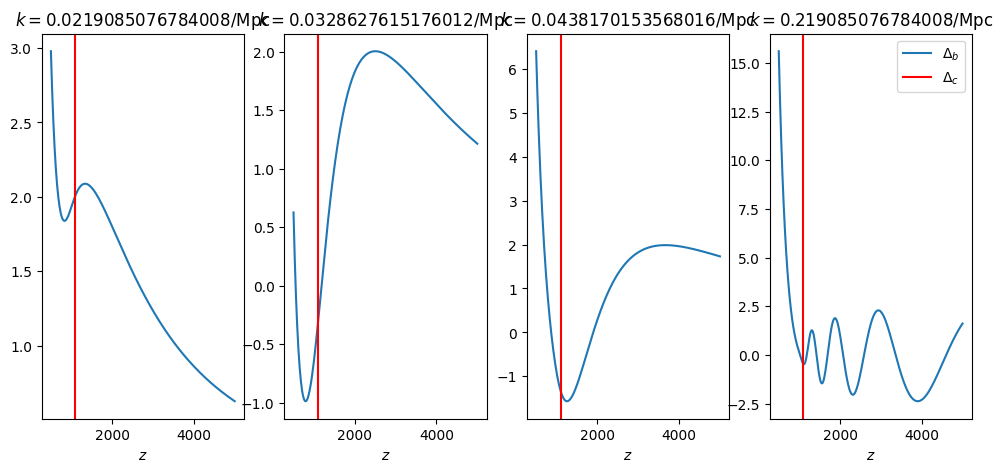

In [136]:
#or as a function of redshift
z = np.linspace(500,5000,300)
krs = [np.pi,3*np.pi/2,np.pi*2,10*np.pi]

rs = data.sound_horizon(1100)
R = 0.75*(0.3 / 1e-5)*(1 + z)

ks = krs / rs
print(rs)
#for j in range(np.size(krs)):
#    ks = krs[0]
#ks = ks / rs
ev = data.get_redshift_evolution(ks, z, ['delta_baryon',])
eta = data.conformal_time(z)
_, axs= plt.subplots(1,4, figsize=(12,5))

for i, ax in enumerate(axs):
    ax.plot(z,ev[i,:, 0])
    #ax.plot(z,ev[i,:, 1])
    #ax.plot(z,ev[i,:, 2])
    ax.set_title(r'$k= %s/\rm{Mpc}$'%ks[i])
    ax.axvline(1100,color="r")
    ax.set_xlabel('$z$');
plt.legend([r'$\Delta_b$', r'$\Delta_c$', r'$\Delta_\gamma$'], loc = 'upper right');

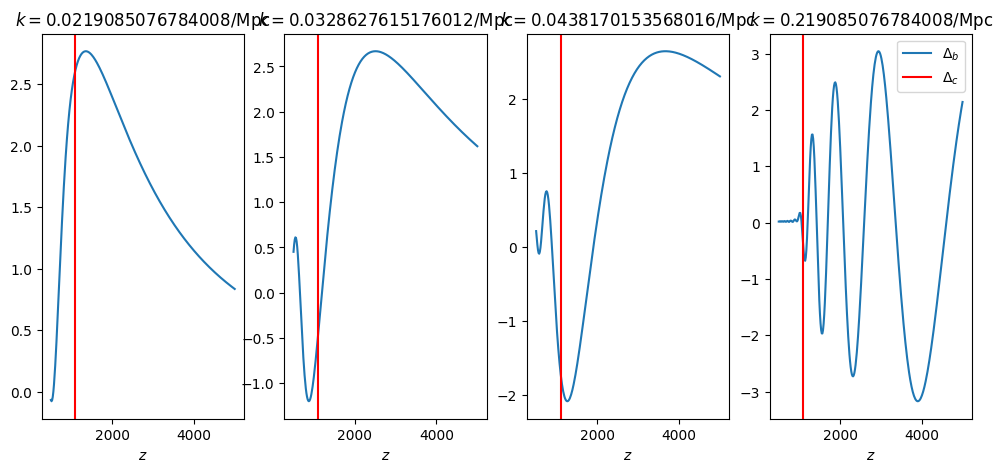

In [137]:
#or as a function of redshift
z = np.linspace(500,5000,300)
krs = [np.pi,3*np.pi/2,np.pi*2,10*np.pi]

rs = data.sound_horizon(1100)
ks = krs / rs

#for j in range(np.size(krs)):
#    ks = krs[0]
#ks = ks / rs
ev = data.get_redshift_evolution(ks, z, ['delta_photon',])
_, axs= plt.subplots(1,4, figsize=(12,5))

for i, ax in enumerate(axs):
    ax.plot(z,ev[i,:, 0])
    #ax.plot(z,ev[i,:, 1])
    #ax.plot(z,ev[i,:, 2])
    ax.set_title(r'$k= %s/\rm{Mpc}$'%ks[i])
    ax.axvline(1100,color="r")
    ax.set_xlabel('$z$');
plt.legend([r'$\Delta_b$', r'$\Delta_c$', r'$\Delta_\gamma$'], loc = 'upper right');

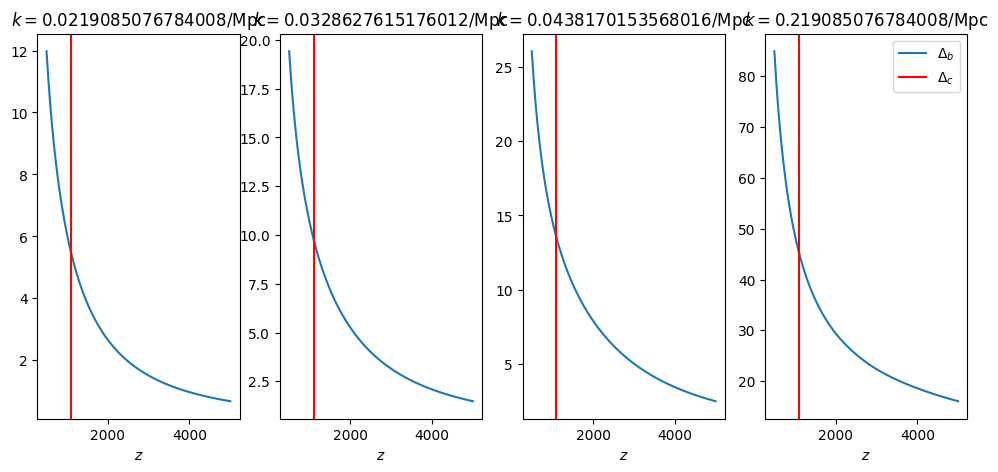

In [132]:
#or as a function of redshift
z = np.linspace(500,5000,300)
krs = [np.pi,3*np.pi/2,np.pi*2,10*np.pi]

rs = data.sound_horizon(1100)
ks = krs / rs

#for j in range(np.size(krs)):
#    ks = krs[0]
#ks = ks / rs
ev = data.get_redshift_evolution(ks, z, ['delta_cdm',])
_, axs= plt.subplots(1,4, figsize=(12,5))

for i, ax in enumerate(axs):
    ax.plot(z,ev[i,:, 0])
    #ax.plot(z,ev[i,:, 1])
    #ax.plot(z,ev[i,:, 2])
    ax.set_title(r'$k= %s/\rm{Mpc}$'%ks[i])
    ax.set_xlabel('$z$');
    ax.axvline(1100,color="r")
plt.legend([r'$\Delta_b$', r'$\Delta_c$', r'$\Delta_\gamma$'], loc = 'upper right');

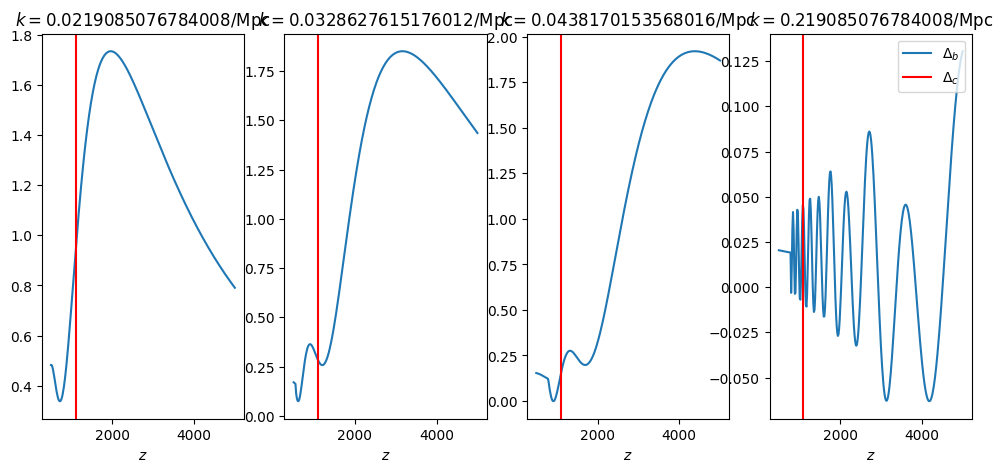

In [133]:
#or as a function of redshift
z = np.linspace(500,5000,300)
krs = [np.pi,3*np.pi/2,np.pi*2,10*np.pi]

rs = data.sound_horizon(1100)
ks = krs / rs

#for j in range(np.size(krs)):
#    ks = krs[0]
#ks = ks / rs
ev = data.get_redshift_evolution(ks, z, ['delta_neutrino',])
_, axs= plt.subplots(1,4, figsize=(12,5))

for i, ax in enumerate(axs):
    ax.plot(z,ev[i,:, 0])
    #ax.plot(z,ev[i,:, 1])
    #ax.plot(z,ev[i,:, 2])
    ax.set_title(r'$k= %s/\rm{Mpc}$'%ks[i])
    ax.set_xlabel('$z$');
    ax.axvline(1100,color="r")
plt.legend([r'$\Delta_b$', r'$\Delta_c$', r'$\Delta_\gamma$'], loc = 'upper right');

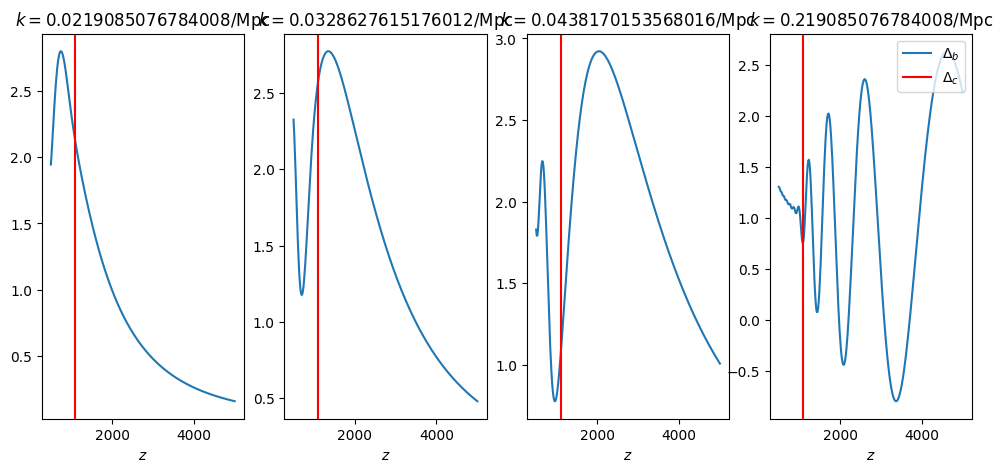

In [134]:
z = np.linspace(500,5000,300)
krs = [np.pi,3*np.pi/2,np.pi*2,10*np.pi]

rs = data.sound_horizon(1100)
ks = krs / rs

#for j in range(np.size(krs)):
#    ks = krs[0]
#ks = ks / rs
ev = data.get_redshift_evolution(ks, z, ['v_photon',])
_, axs= plt.subplots(1,4, figsize=(12,5))

for i, ax in enumerate(axs):
    ax.plot(z,ev[i,:, 0])
    #ax.plot(z,ev[i,:, 1])
    #ax.plot(z,ev[i,:, 2])
    ax.set_title(r'$k= %s/\rm{Mpc}$'%ks[i])
    ax.set_xlabel('$z$');
    ax.axvline(1100,color="r")
plt.legend([r'$\Delta_b$', r'$\Delta_c$', r'$\Delta_\gamma$'], loc = 'upper right');

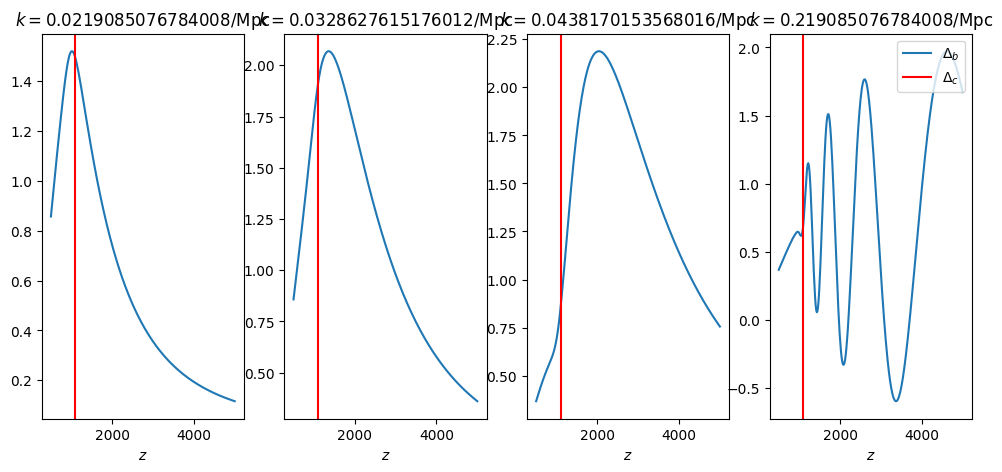

In [135]:
z = np.linspace(500,5000,300)
krs = [np.pi,3*np.pi/2,np.pi*2,10*np.pi]

rs = data.sound_horizon(1100)
ks = krs / rs

#for j in range(np.size(krs)):
#    ks = krs[0]
#ks = ks / rs
ev = data.get_redshift_evolution(ks, z, ['v_baryon_cdm',])
_, axs= plt.subplots(1,4, figsize=(12,5))

for i, ax in enumerate(axs):
    ax.plot(z,ev[i,:, 0])
    #ax.plot(z,ev[i,:, 1])
    #ax.plot(z,ev[i,:, 2])
    ax.set_title(r'$k= %s/\rm{Mpc}$'%ks[i])
    ax.set_xlabel('$z$');
    ax.axvline(1100,color="r")
plt.legend([r'$\Delta_b$', r'$\Delta_c$', r'$\Delta_\gamma$'], loc = 'upper right');